In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\GIGA G5\\Desktop\\DATA\\doanhsobanhang\\'
dataframe = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\GIGA G5\\Desktop\\DATA\\doanhsobanhang\\'

In [3]:
#Clean and preprocess data

In [4]:
#Merge 12-month data

In [5]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('ammialSales2019.csv', index = False)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
#Task 2.2: Add 'Month' column

In [8]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [12]:
print(set(df['Month']))

{'03', '04', '11', '10', '08', '09', '05', '12', '01', '02', '06', '07'}


In [9]:
#Tast 2.3: Get rid of "NaN" and "Or" value

In [10]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [11]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
#Tast 3: Reporting

In [14]:
#Tast 3.1: What was the best month foe sales? How much was earned that month?

In [17]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [16]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [18]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [19]:
moving_column = df.pop("Sales")
df.insert(5, "Sales", moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,141234,iPhone,1,700.000000,01/22/19 21:25,700.000000,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,14.950000,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,23.980000,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,149.990005,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,11.990000,"387 10th St, Austin, TX 73301",01


In [20]:
df.groupby('Month').sum()['Sales'] 

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [21]:
sales_value = df.groupby('Month').sum()['Sales'] 
sales_value.max()

4613443.5

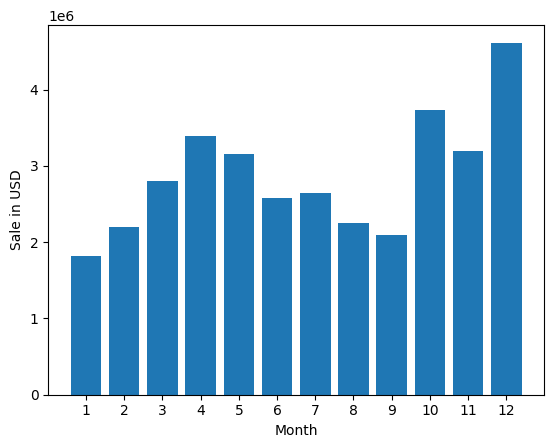

In [29]:
month = range(1, 13)
plt.bar(x = month , height = sales_value)
plt.xticks(month)
plt.xlabel("Month")
plt.ylabel("Sale in USD")
plt.show()

In [50]:
#Nhận xét tại sao tháng 12 lại có doanh thu cao nhất?
#Tháng 12 có doanh thu cao nhất có thể liên quan đến khi ở Mỹ tháng 12 có 2 dịp lễ lớn là Chrismas and New Year, etc
#Hoặc các hãng thương mại điện tử lớn thì launches vào quý 3

In [30]:
#Tast 3.2: What City has the best sales?

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,141234,iPhone,1,700.000000,01/22/19 21:25,700.000000,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,14.950000,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,23.980000,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,149.990005,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,11.990000,"387 10th St, Austin, TX 73301",01


In [35]:
sample_address = '944 Walnut St, Boston, MA 02215'
sample_address.split(',')[1]

' Boston'

In [37]:
address_to_city = lambda address:address.split(',')[1]

In [40]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,14.950000,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,11.990000,"387 10th St, Austin, TX 73301",01,Austin


In [42]:
df.groupby('City').sum()['Sales']

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [43]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

8262204.0

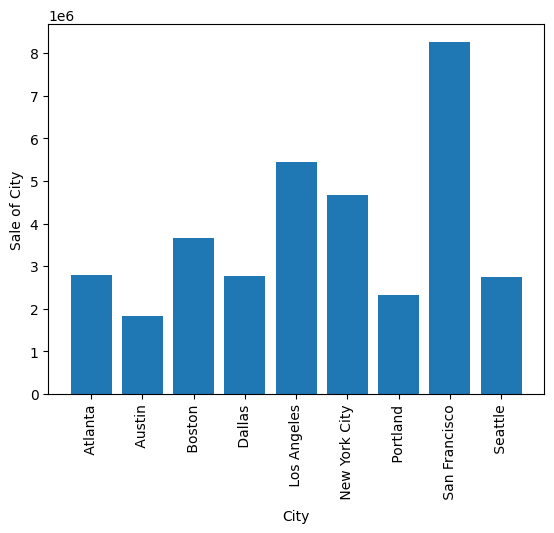

In [49]:
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height= sales_value_city)
plt.xticks(cities, rotation = 90)
plt.xlabel("City")
plt.ylabel("Sale of City")
plt.show()

In [51]:
#Why
# Bởi vì San Francisco có Silicon Valley tọa lạc nên các công ty công nghệ ở đây nhiều
#Hay có các kỹ sư công nghệ nhiều nên thích đồ công nghệ nhiều

In [52]:
#Tast 3.3 Doanh nghiệp thường chiếu quảng cáo vào thời gian nào để tăng nhu cầu mua hàng của khách hàng

In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,14.950000,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,11.990000,"387 10th St, Austin, TX 73301",01,Austin


In [55]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7948\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [69]:
print(df['Order Date'].dtypes)
print(df['Hours'].dtypes)

datetime64[ns]
int32


In [71]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,14.950000,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,11.990000,"387 10th St, Austin, TX 73301",01,Austin,11


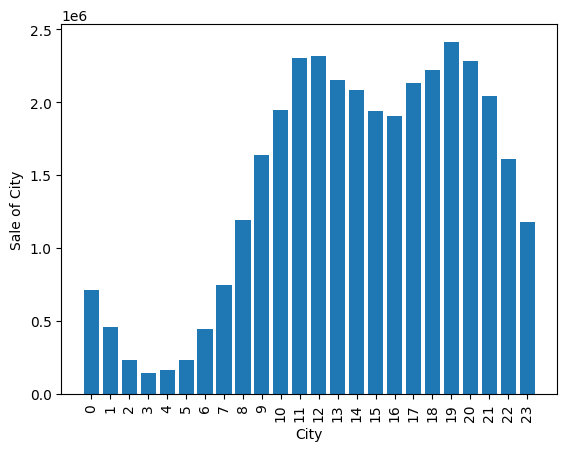

In [76]:
sales_value_hours = df.groupby('Hours')['Sales'].sum()
hours = [hour for hour, sales in sales_value_hours.items()]
plt.bar(x=hours, height= sales_value_hours)
plt.xticks(hours, rotation = 90)
plt.xlabel("City")
plt.ylabel("Sale of City")
plt.show()

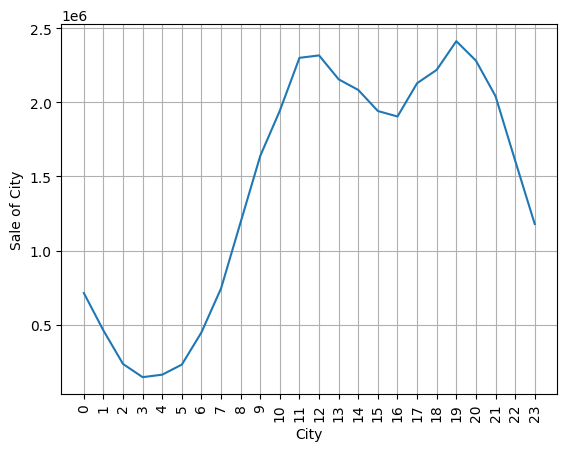

In [79]:
sales_value_hours = df.groupby('Hours')['Sales'].sum()
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours,  sales_value_hours)
plt.grid()
plt.xticks(hours, rotation = 90)
plt.xlabel("City")
plt.ylabel("Sale of City")
plt.show()

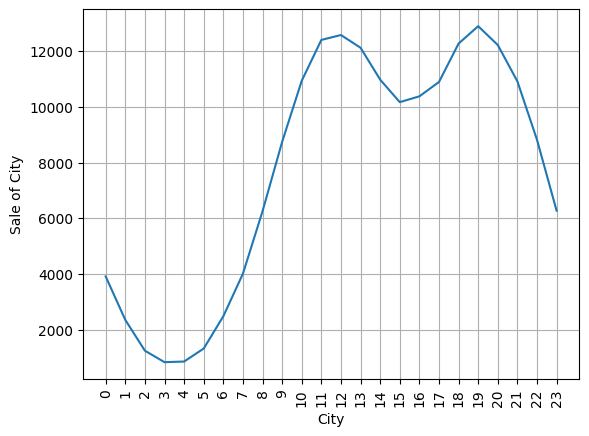

In [80]:
sales_value_hours = df.groupby('Hours')['Sales'].count()
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours,  sales_value_hours)
plt.grid()
plt.xticks(hours, rotation = 90)
plt.xlabel("City")
plt.ylabel("Sale of City")
plt.show()

In [81]:
#Tast 3.4 Những sản phẩm nào thường được bán cùng nhau
#Các sản phẩm thường được giao cùng lúc và có cùng một địa điểm 

In [82]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,14.950000,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,11.990000,"387 10th St, Austin, TX 73301",01,Austin,11


In [83]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,11.95,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,11.99,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,150.00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,11.52,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,400.00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [85]:
groupProduct = lambda product:', '.join(product)

In [87]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup

C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7948\3317995966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hours,All Product
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,11.95,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,11.99,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,150.00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,11.52,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,400.00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,3.84,"106 7th St, Atlanta, GA 30301",09,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,11.99,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,5.98,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,600.00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [91]:
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()

In [94]:
df_dup['All Product'].value_counts().head()

All Product
iPhone, Lightning Charging Cable         882
Google Phone, USB-C Charging Cable       856
iPhone, Wired Headphones                 361
Vareebadd Phone, USB-C Charging Cable    312
Google Phone, Wired Headphones           303
Name: count, dtype: int64

In [95]:
#Task 3.5 Sản phẩm nào được bán nhiều nhất, Giả thuyết vì sao bén nhiều nhất

In [96]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,14.950000,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,11.990000,"387 10th St, Austin, TX 73301",01,Austin,11


In [104]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()

all_products 

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

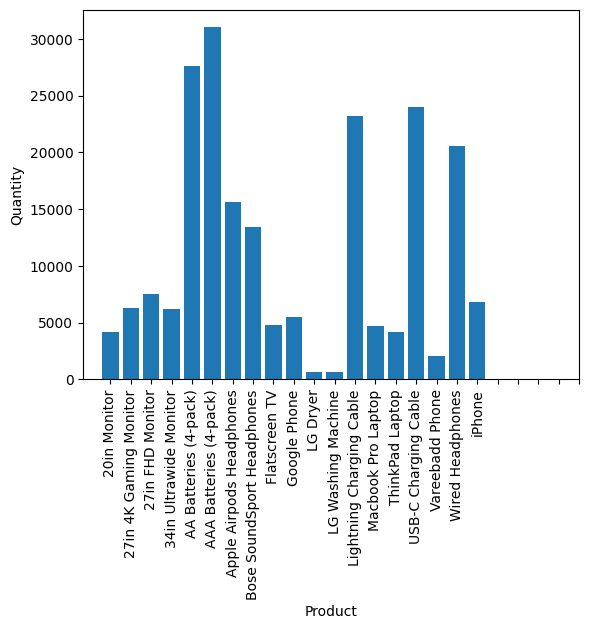

In [105]:

products = [product for product, quant in all_products.items()]
plt.bar(x=products, height= all_products)
plt.xticks(hours, rotation = 90)
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

In [111]:
#Giá cả, Thương hiệu, Chất lượng sp
pricess = df.groupby('Product')['Price Each'].mean()
pricess

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7948\2794776658.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 90)


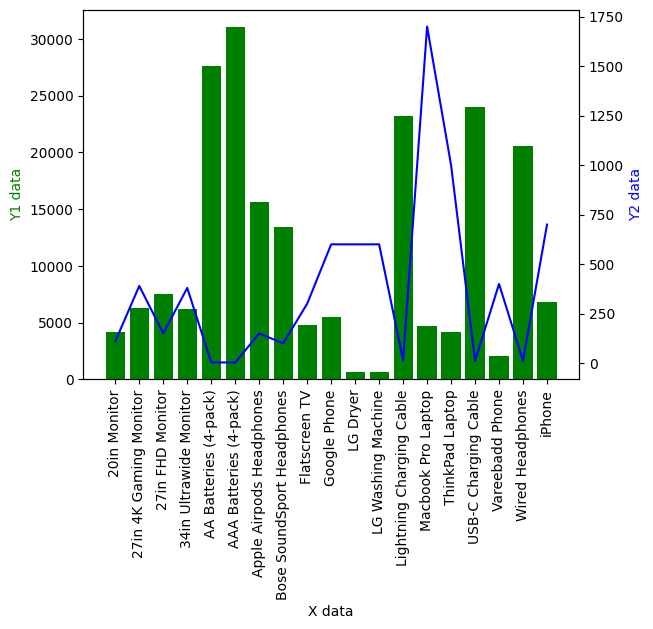

In [119]:

x = products
y1 = all_products
y2 = pricess

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products, rotation = 90)
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [ ]:
#Triple A và Double A bán ra nhiều hơn do giá thành thấp hơn
# Các dòng macbook và thinkpad được bán với giá cao nên số lương mua sẽ thấp hơn
# các dòng sản phẩm từ LG tuy mức giá trung bình nhưng vẫn ít người mua, thì đó là do giá trị thương hiệu nên số lượng bán ra ít